In [2]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

import numpy as np
import os
import PIL
import gzip
import pandas as pd


from tensorflow import keras
from tensorflow.keras.models import Sequential
from sklearn.model_selection import KFold, StratifiedKFold
from tensorflow.keras.preprocessing.image import ImageDataGenerator


from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras import backend as K
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [3]:
#ignore warning messages 
import warnings
import seaborn as sns

warnings.filterwarnings('ignore') 

sns.set()

In [4]:
dataset = pd.read_csv("A_Z Handwritten Data/A_Z Handwritten Data.csv").astype('float32')
dataset.rename(columns={'0':'label'}, inplace=True)

# Splite data the X - Our data , and y - the prdict label
X = dataset.drop('label',axis = 1)
y = dataset['label']

In [ ]:
print("shape:",X.shape)
print("culoms count:",len(X.iloc[1]))
print("784 = 28 X 28")

X.head()

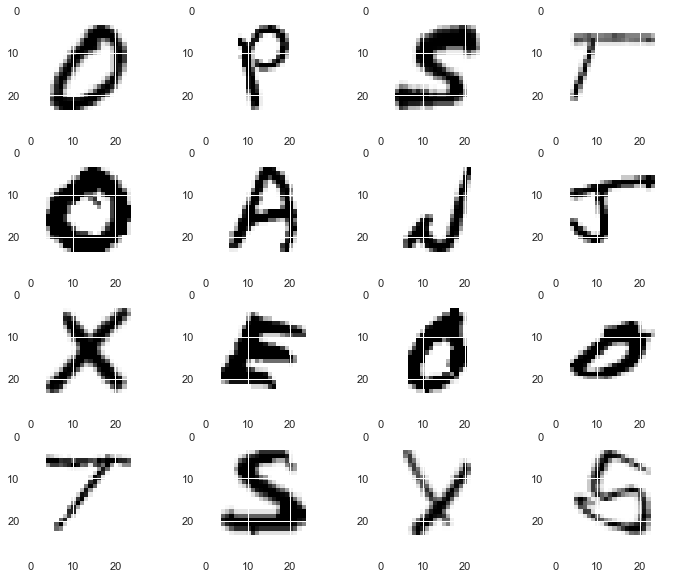

In [11]:
from sklearn.utils import shuffle

X_shuffle = shuffle(X)

plt.figure(figsize = (12,10))
row, colums = 4, 4
for i in range(16):  
    plt.subplot(colums, row, i+1)
    plt.imshow(X_shuffle.iloc[i].values.reshape(28,28),interpolation='nearest', cmap='Greys')
plt.show()

Amount of each labels


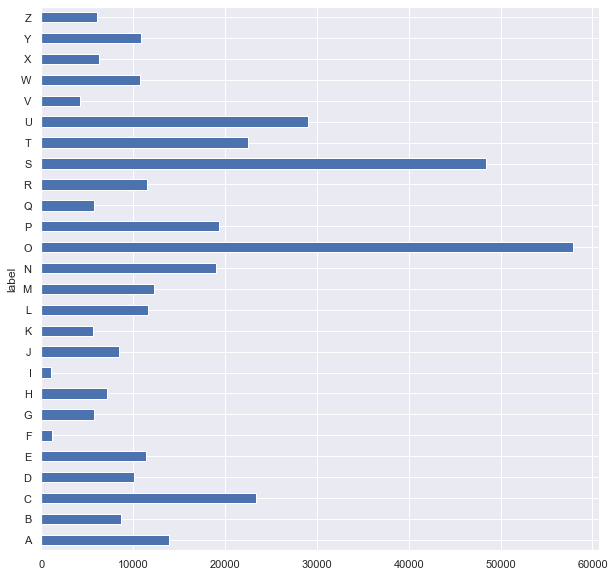

We have very low observations for I and F 
I count: 1120
F count: 1163


In [12]:
print("Quantidade de cada label")

# Change label to alphabets
alphabets_mapper = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X',24:'Y',25:'Z'} 
dataset_alphabets = dataset.copy()
dataset['label'] = dataset['label'].map(alphabets_mapper)

label_size = dataset.groupby('label').size()
label_size.plot.barh(figsize=(10,10))
plt.show()

print("We have very low observations for I and F ")
print("I count:", label_size['I'])
print("F count:", label_size['F'])

# Tratando

In [14]:
# splite the data
X_train, X_test, y_train, y_test = train_test_split(X,y)

X_train.to_csv('X_train_cnn.csv')
X_test.to_csv('X_test_cnn.csv')
y_train.to_csv('y_train_cnn.csv')
y_test.to_csv('y_test_cnn.csv')

# scale data
standard_scaler = MinMaxScaler()
standard_scaler.fit(X_train)

# Colocar isso no notebook final
X_train = standard_scaler.transform(X_train)
X_test = standard_scaler.transform(X_test)



Dado depois de normalizar


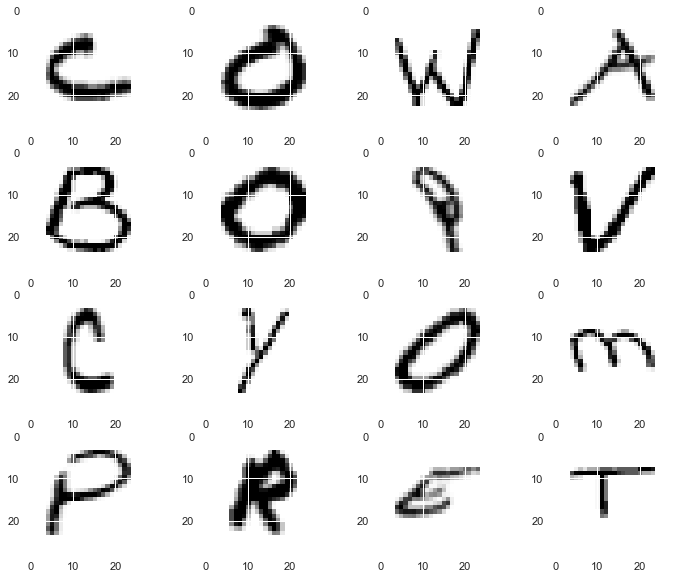

In [15]:
print("Dado depois de normalizar")
X_shuffle = shuffle(X_train)

plt.figure(figsize = (12,10))
row, colums = 4, 4
for i in range(16):  
    plt.subplot(colums, row, i+1)
    plt.imshow(X_shuffle[i].reshape(28,28),interpolation='nearest', cmap='Greys')
plt.show()

In [16]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')

y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

# Criando modelo com 6 camadas, feito cebola, e usando cross entropy pra fazer o famoso cotovelo, de tuning de parametro 

In [5]:
cls = Sequential()
cls.add(Conv2D(32, (5, 5), input_shape=(28, 28, 1), activation='relu'))
cls.add(MaxPooling2D(pool_size=(2, 2)))
cls.add(Dropout(0.3))
cls.add(Flatten())
cls.add(Dense(128, activation='relu'))
cls.add(Dense(len(y.unique()), activation='softmax'))

In [6]:
cls.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 4608)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               589952    
_________________________________________________________________
dense_1 (Dense)              (None, 26)                3354      
Total params: 594,138
Trainable params: 594,138
Non-trainable params: 0
__________________________________________________

In [17]:


cls.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = cls.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=18, batch_size=200, verbose=2)

scores = cls.evaluate(X_test,y_test, verbose=0)
print("CNN Score:",scores[1])

Epoch 1/18
1397/1397 - 22s - loss: 0.2317 - accuracy: 0.9361 - val_loss: 0.0942 - val_accuracy: 0.9745
Epoch 2/18
1397/1397 - 5s - loss: 0.0865 - accuracy: 0.9759 - val_loss: 0.0740 - val_accuracy: 0.9803
Epoch 3/18
1397/1397 - 5s - loss: 0.0656 - accuracy: 0.9813 - val_loss: 0.0598 - val_accuracy: 0.9838
Epoch 4/18
1397/1397 - 5s - loss: 0.0542 - accuracy: 0.9843 - val_loss: 0.0521 - val_accuracy: 0.9858
Epoch 5/18
1397/1397 - 5s - loss: 0.0448 - accuracy: 0.9867 - val_loss: 0.0486 - val_accuracy: 0.9872
Epoch 6/18
1397/1397 - 5s - loss: 0.0373 - accuracy: 0.9887 - val_loss: 0.0470 - val_accuracy: 0.9880
Epoch 7/18
1397/1397 - 5s - loss: 0.0323 - accuracy: 0.9898 - val_loss: 0.0436 - val_accuracy: 0.9893
Epoch 8/18
1397/1397 - 5s - loss: 0.0284 - accuracy: 0.9911 - val_loss: 0.0421 - val_accuracy: 0.9898
Epoch 9/18
1397/1397 - 5s - loss: 0.0247 - accuracy: 0.9920 - val_loss: 0.0412 - val_accuracy: 0.9905
Epoch 10/18
1397/1397 - 5s - loss: 0.0221 - accuracy: 0.9928 - val_loss: 0.0397 -

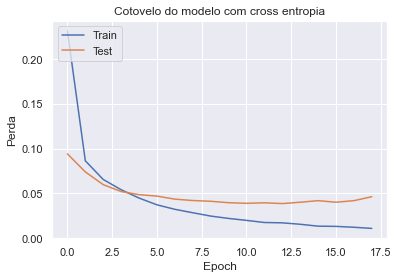

In [19]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Cotovelo do modelo com cross entropia')
plt.ylabel('Perda')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [2]:
import coremltools


In [3]:

cls.save('my_model.h5')

output_labels = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z']
core_ml=coremltools.converters.keras.convert('my_model.h5', input_names=['image'], output_names=['output'], 
    class_labels=output_labels,image_scale=1/255.0, is_bgr = False, image_input_names = "image")
core_ml.save('coreml_model.mlmodel')

NameError: name 'cls' is not defined

1. Metodos Avançado (Gradient Boosting, Random Forest, Redes Neurais) **2.0**
- [ ] Gradient Boost satizfaz o indio (Catboot)
- [ ] Redes Neurais Convolucionais (Reconhecimento De Letras) satizfaz o Joao (Tensorflow)
- [ ] Redes Neurais RNN(Translation) satizfaz os dois
2. Evolução dos resultados e tuning dos parametros **2.0**
- [ ] Grid Search pra achar parametro
- [ ] Cross Validation no test
3. Avaliar resultados **2.0**
- [ ] Comparar os resultados, e justificar com base nos algoritmos
4. Limpeza **1.0**
- [ ] Tratamento e Geração dos dados em um dataset
- [ ] Machine learn de fato em outro
5. Documentação do Dossie: Experimentos, implementação, teste, evolução e avaliação + Link do git **3.0**
- [ ] Documentar no dossie, tudo em direito sobre porque e como, e resultado

# Tensorflow pra tentar dizer do que se trata a noticia



## baixando os dados

In [2]:
all_data =  datasets.cifar10
imgs = all_data.load_data()
(train_images, train_labels), (test_images, test_labels) = all_data.load_data()

imgs = np.concatenate((train_images, test_images))


## tentando o Cross Validation

In [ ]:
kf = KFold(n_splits = 5)


# Minisk data recog

In [5]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
assert x_train.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

# Ou para achar a noticia pela imagem (Optical Character Recognition model)
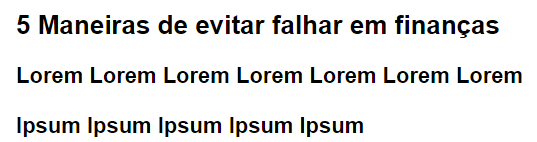